## TASK-4 : Explore Decision Tree Algorithm

## Name: Sanjana Basu

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.

I will be demostrating the decision tree algorithm usinf the IRIS dataset that will give a conceptual clarity and the TITANIC dataset that will give an insight into the actual model building process.

In [1]:
pip install graphviz

Phases in the implementation of Decision Tree:

1.Building Phase:

    a. Preprocess data
    b. Split the data
    c. Train the classifier
    
2.Operational phase:

    a. Make predictions
    b. Check the accuracy (IRIS only)

### IMPORT LIBRARIES

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import graphviz 
from sklearn import tree

### PHASE 1: DATA PREPROCESSING

### IMPORT DATASET IRIS

In [3]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### CREATE FEATURE AND TARGET DATA

In [4]:
X=df.drop(['Id','Species'],axis=1)
y=df['Species']

### SPLIT INTO TRAIN AND TEST

In [5]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

### CREATE THE CLASSIFIER AND TRAIN IT

In [6]:
clf= DecisionTreeClassifier()
model=clf.fit(Xtrain,ytrain)

### VISUALIZE THE DECISION TREE

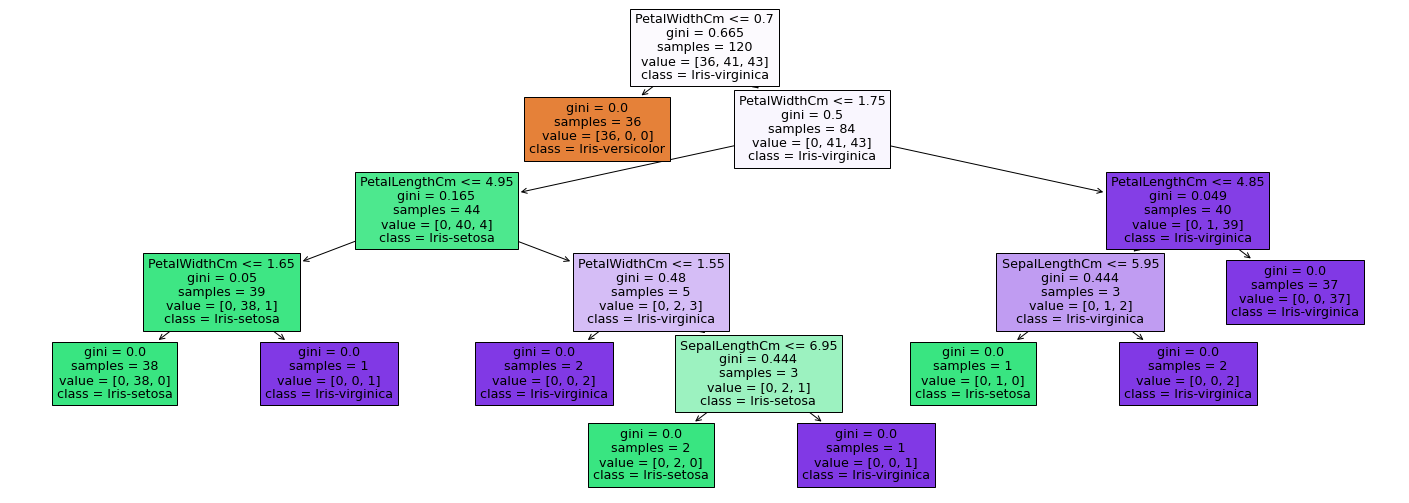

In [7]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(25,9))
_=tree.plot_tree(clf,feature_names=Xtrain.columns,class_names=ytrain.unique(),filled=True)

### PHASE 2: MAKE PREDICTIONS AND COMPARE IT TO THE ACTUALS

In [8]:
y_pred=clf.predict(Xtest)

Prediction= pd.DataFrame(y_pred)
Prediction.columns=['Predicted']
Prediction.head()

Actual= pd.DataFrame(ytest)
Actual.columns=['Actual']
Actual=Actual.reset_index()
Actual.head()

Actual.drop('index',axis=1,inplace=True)

compare=pd.concat([Actual,Prediction],axis=1)
compare.head()

,Actual,Predicted
0,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
2,Iris-versicolor,Iris-versicolor
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor


### CHECK THE ACCURACY

In [9]:
unmatched= compare[compare['Actual']!=compare['Predicted']]['Actual'].value_counts().sum()

matched= compare[compare['Actual']==compare['Predicted']]['Actual'].value_counts().sum()

Accuracy= (matched/len(compare['Actual']))*100
print(Accuracy)

100.0


In [10]:
score= accuracy_score(ytest,y_pred)
score

1.0

_______________________________________________________________________________________________________________________________

### IMPORT DATASET TITANIC TRAIN AND TEST

In [11]:
df=pd.read_csv('Titanictrain.csv')
Xtest=pd.read_csv('titanictest.csv')

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### PHASE 1: DATA PREPROCESSING

### SPLITTING THE DATA

In [13]:
Xtrain=df.drop(['PassengerId','Survived'],axis=1)
ytrain=df['Survived']
Xtest=Xtest.drop('PassengerId',axis=1)

In [14]:
def clean_name(x):
    l=[]
    if isinstance(x,str):
        l=x.split(", ")
        x=l[0]
    return(x)

Xtrain['Surname'] = df['Name'].apply(clean_name).astype('str')

def clean_title(x):
    l=[]
    t=[]
    if isinstance(x,str):
        l=x.split(", ")
        s=l[1]
        t=s.split(". ")
        x= t[0]
    return(x)

Xtrain['Title'] = df['Name'].apply(clean_title).astype('str')

def new_title(x,Sex,Age):
    a=''
    if isinstance(x,str):
        if x in ['Mr', 'Mrs', 'Miss', 'Master']:
            a=x
        else:
            if Sex=='female' and Age<30:
                a='Miss'
            elif Sex=='female' and Age>=30:
                a='Mrs'
            elif Sex=='male' and Age>=18:
                a='Mr'
            else:
                a='Master'
    return(a)            

Xtrain['Title'] = Xtrain.apply(lambda x: new_title(x['Title'], x['Sex'],x['Age']), axis=1)

In [15]:
sur= Xtrain.groupby('Surname').count()['Title']
Xtrain['Fam_count']=Xtrain['Surname'].map(sur)

def isfam(x):
    if x>1:
        a=1
    else:
        a=0
    return(a)

Xtrain['IsFamily']=Xtrain['Fam_count'].apply(isfam)

In [16]:
Xtrain.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Fam_count,IsFamily
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,2,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,1,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,1,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,2,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,2,1


Drop unnecessary features and encoding the categorical features for the model

In [17]:
Xtrain=Xtrain.drop(['Name','Ticket','Cabin','Surname','Fam_count'],axis=1)

Xtrain['Age'].fillna(Xtrain['Age'].median(),inplace=True)
Xtrain['Embarked'].fillna(Xtrain['Embarked'].mode()[0],inplace=True)

Xtrain['Title']=Xtrain['Title'].replace({'Mr':0,'Mrs':1,'Master':2,'Miss':3})
Xtrain['Sex']=Xtrain['Sex'].replace({'male':0,'female':1})

Xtrain['Embarked']=Xtrain['Embarked'].replace({'C':0,'S':1,'Q':2})

### TRANSFORMING THE DATA FOR ACCURACY

In [18]:
from sklearn import preprocessing
Xtrain1 = preprocessing.scale(Xtrain.values)
ytrain.replace({0:'Not Survived',1:'Survived'},inplace=True)

### CREATING THE CLASSIFIER AND TRAINING IT

In [19]:
clf= DecisionTreeClassifier()
model=clf.fit(Xtrain1,ytrain)

### VISUALIZING THE DECISION TREE

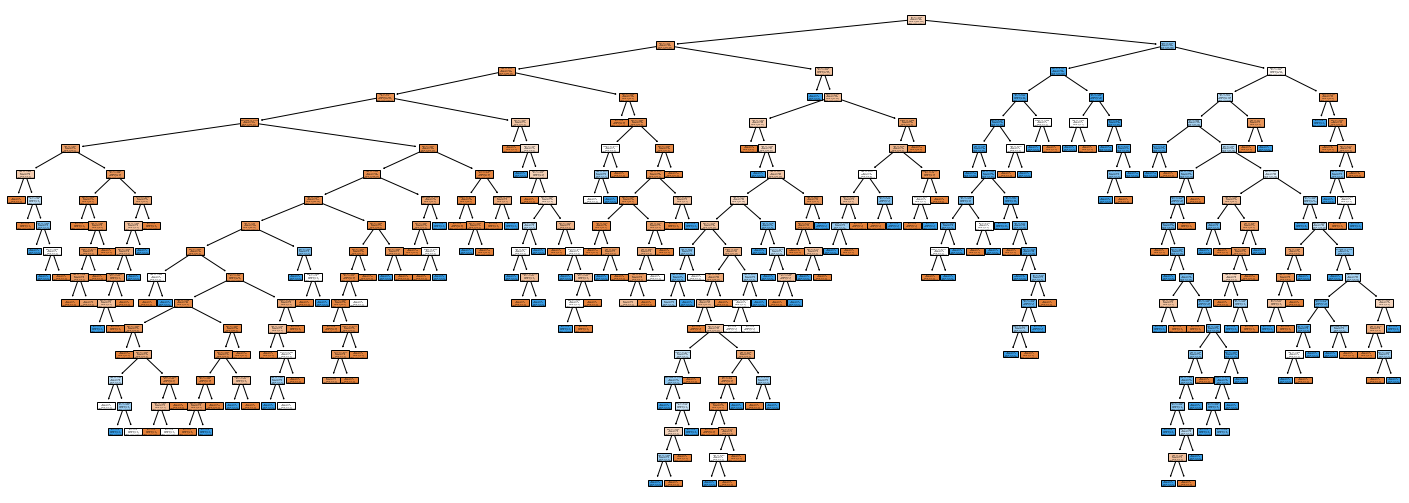

In [20]:
fig= plt.figure(figsize=(25,9))
_=tree.plot_tree(clf,feature_names=Xtrain.columns,class_names=ytrain.unique(),filled=True)

### PHASE 2: OPERATIONAL

### DATA PRE-PROCESSING OF TEST DATA AS PER REQUIRED INPUTS

In [21]:
Xtest.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [22]:
Xtest['Surname'] = Xtest['Name'].apply(clean_name).astype('str')
Xtest['Title'] = Xtest['Name'].apply(clean_title).astype('str')
Xtest['Title'] = Xtest.apply(lambda x: new_title(x['Title'], x['Sex'],x['Age']), axis=1)

sur= Xtest.groupby('Surname').count()['Title']
Xtest['Fam_count']=Xtest['Surname'].map(sur)

Xtest['IsFamily']=Xtest['Fam_count'].apply(isfam)

Xtest=Xtest.drop(['Name','Ticket','Cabin','Surname','Fam_count'],axis=1)

Xtest['Age'].fillna(Xtest['Age'].median(),inplace=True)
Xtest['Fare'].fillna(Xtest['Fare'].median(),inplace=True)
Xtest['Title']=Xtest['Title'].replace({'Mr':0,'Mrs':1,'Master':2,'Miss':3})
Xtest['Sex']=Xtest['Sex'].replace({'male':0,'female':1})
Xtest['Embarked']=Xtest['Embarked'].replace({'C':0,'S':1,'Q':2})

In [23]:
Xtest.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsFamily
0,3,0,34.5,0,0,7.8292,2,0,0
1,3,1,47.0,1,0,7.0000,1,1,0
2,2,0,62.0,0,0,9.6875,2,0,0
3,3,0,27.0,0,0,8.6625,1,0,0
4,3,1,22.0,1,1,12.2875,1,1,0


In [24]:
Xtest1 = preprocessing.scale(Xtest.values)

### MAKING PREDICTIONS

In [25]:
y_pred=clf.predict(Xtest1)

### PRINTING THE RESULTS

In [26]:
Prediction= pd.DataFrame(y_pred)
Prediction.columns=['Predicted']
print('Number of people predicted to survive=',Prediction.iloc[:,0].value_counts()[1])
print('Number of people predicted to not survive=',Prediction.iloc[:,0].value_counts()[0])

Number of people predicted to survive= 195
Number of people predicted to not survive= 223


### VISUALIZING THE DECISION TREE

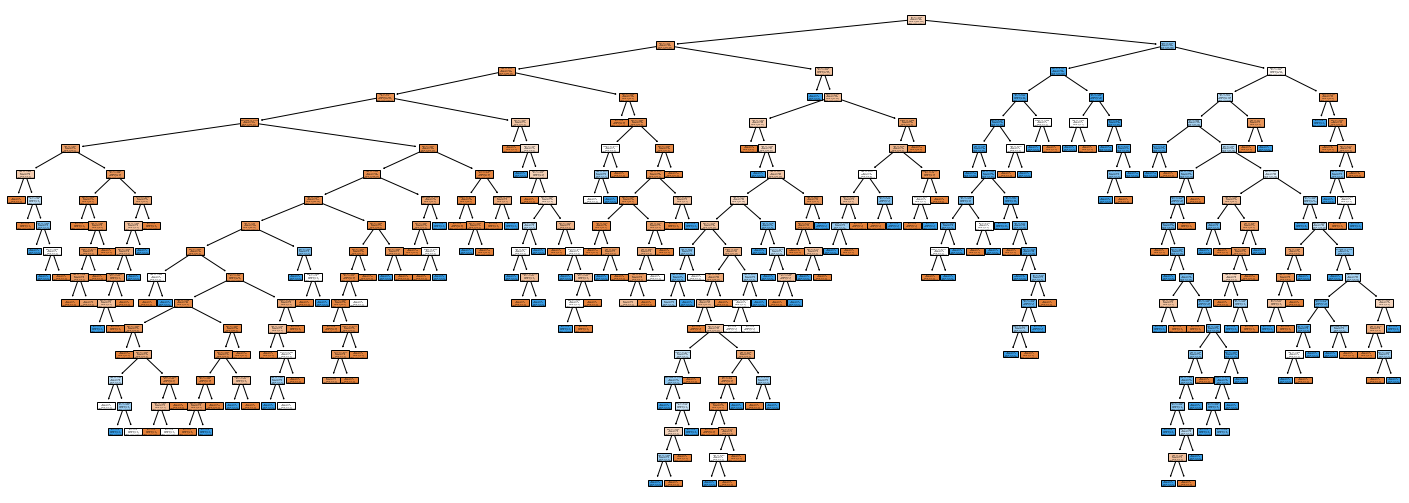

In [28]:
a= Prediction['Predicted'].unique()

fig= plt.figure(figsize=(25,9))
_=tree.plot_tree(clf,feature_names=Xtest.columns,class_names=a,filled=True)

Accuracy score could not be generated due to lack of y_test data.

## THANK YOU